In [1]:
from sklearn.model_selection import train_test_split
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

from statsmodels.tsa.arima_model import ARIMA

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import statsmodels.api as sm

import dateparser

In [2]:
df=pd.read_csv(r'C:\Users\Dell\Downloads\time series av\train.csv')
test_orig=pd.read_csv(r'C:\Users\Dell\Downloads\time series av\test.csv')
sample_submission=pd.read_csv(r'C:\Users\Dell\Downloads\time series av\sample_submission.csv')

In [3]:
def date_diff(x):
    
    for col in x.columns:
        if x[col].dtype == 'object':
            x[col] = x[col].replace('/','-')
            try:
                x[col] = pd.to_datetime(x[col])
            except ValueError:
                pass
   
    return x

In [4]:
df=date_diff(df)

In [5]:
df=df.sort_values('Datetime')

In [6]:
df = df.set_index('Datetime')

In [7]:
df.drop('ID',axis=1,inplace=True)

In [8]:
test=date_diff(test_orig)

In [9]:
test=test.sort_values('Datetime')

In [10]:
test = test.set_index('Datetime')

In [11]:
test.drop('ID',axis=1,inplace=True)

In [12]:
test

""
Datetime
2014-01-10 00:00:00
2014-01-10 01:00:00
2014-01-10 02:00:00
2014-01-10 03:00:00
2014-01-10 04:00:00
...
2015-12-04 19:00:00
2015-12-04 20:00:00
2015-12-04 21:00:00


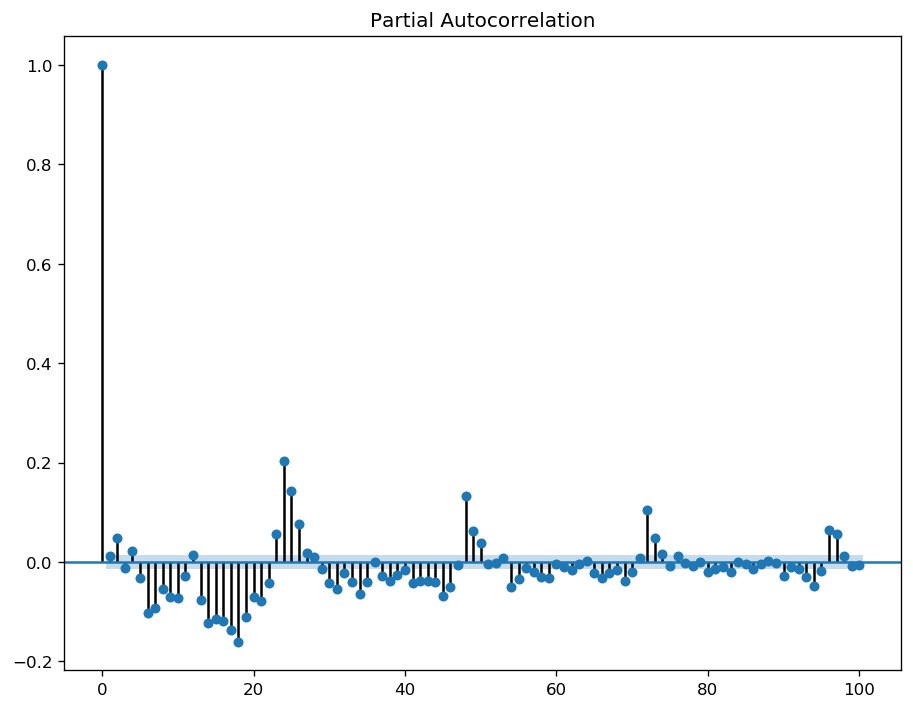

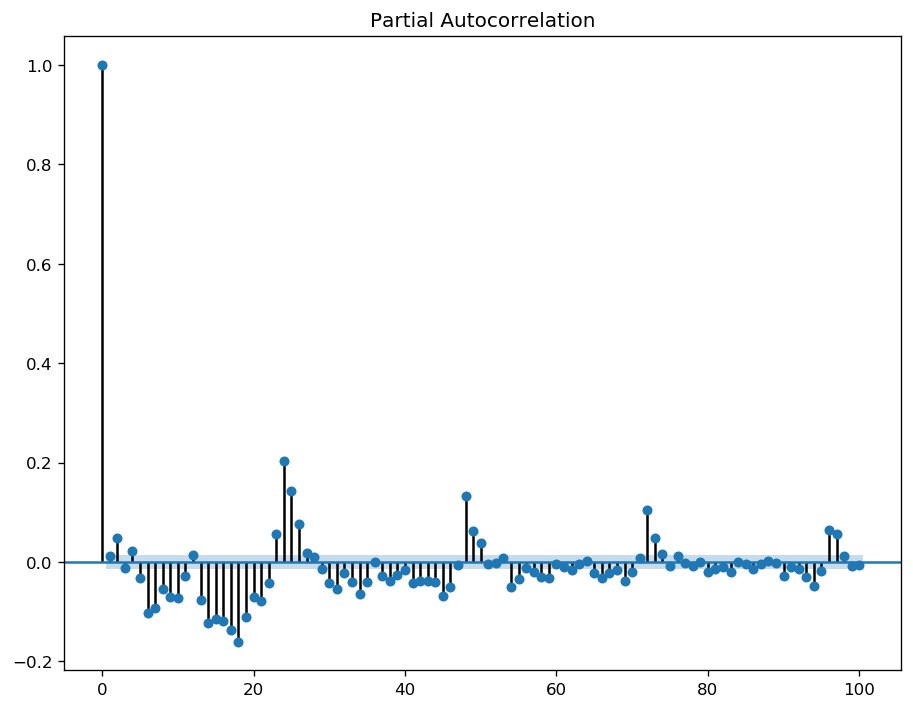

In [13]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
plot_pacf(df.Count.diff().dropna(), lags = 100)

C:\Users\Dell\anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


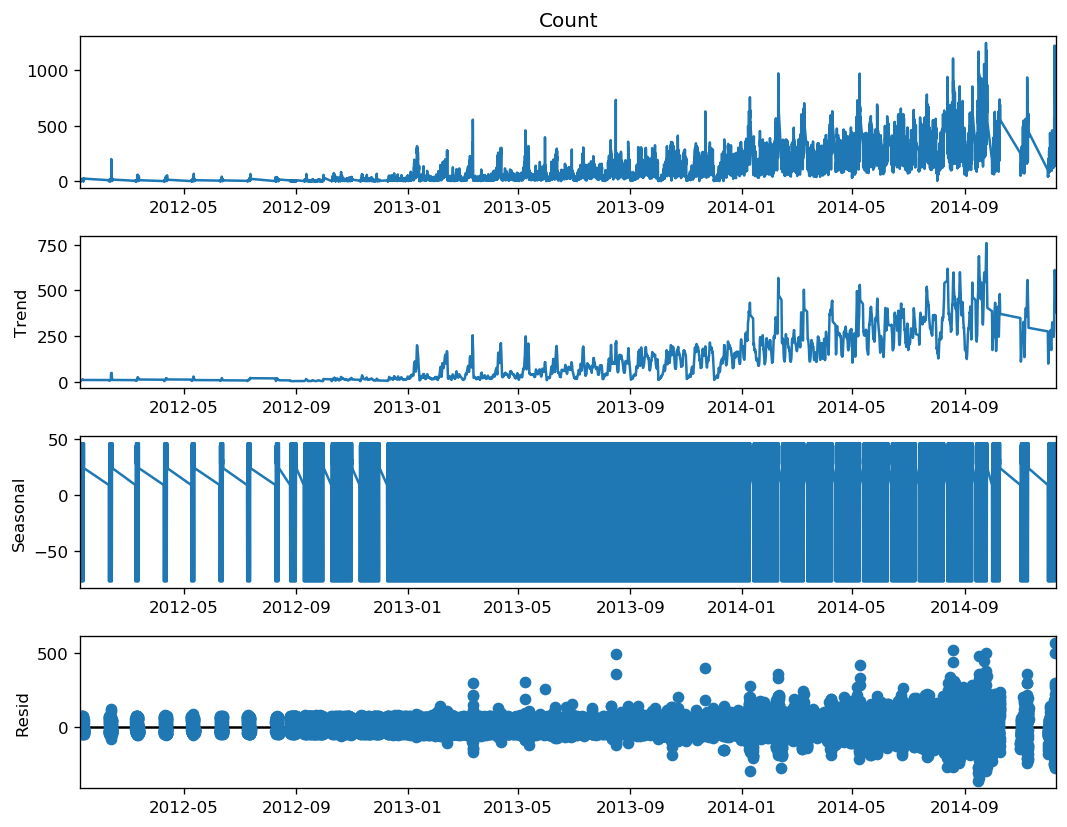

In [14]:
sm.tsa.seasonal_decompose(df.Count, freq=24).plot()
result = sm.tsa.stattools.adfuller(df.Count)
plt.show()

In [ ]:
arima = sm.tsa.statespace.SARIMAX(df,order=(0,1,2),seasonal_order=(0,1,2,8)).fit()
arima.summary()

C:\Users\Dell\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Dell\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
from sklearn.metrics import mean_squared_error
pred = arima.predict(16288,16788)[1:]
print('ARIMA model MSE:{}'.format(mean_squared_error(df.iloc[16288:16788],pred)))

In [42]:
prediction = arima.predict(start=18288,end=23399)

C:\Users\Dell\anaconda4\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [43]:
prediction

18288    255.787543
18289    148.486859
18290     87.632827
18291    169.434112
18292    128.107022
            ...    
23395      0.000000
23396      0.000000
23397      0.000000
23398      0.000000
23399      0.000000
Length: 5112, dtype: float64

In [44]:
a=[]

In [45]:
for i in range(len(prediction)):
    a.append(round(abs(prediction.iloc[i])))

In [46]:
a

[256.0,
 148.0,
 88.0,
 169.0,
 128.0,
 89.0,
 89.0,
 81.0,
 41.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.

In [47]:
t=[]
for i in range(len(a)):
    t.append(i+18288)

In [48]:
d={'ID':t,'Count':a}
sub=pd.DataFrame(data=d)

In [49]:
sub

,ID,Count
0,18288,256.0
1,18289,148.0
2,18290,88.0
3,18291,169.0
4,18292,128.0
...,...,...
5107,23395,0.0
5108,23396,0.0
5109,23397,0.0
5110,23398,0.0


In [50]:
sub['Count']=sub['Count'].astype(int)

In [51]:
sub.to_csv(r'C:\Users\Dell\Downloads\time series av\submission8.csv',index=False)